In [ ]:
import os

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.graph_objs as go
import plotly.offline as py

from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
DataSet = pd.read_csv('/content/drive/MyDrive/SCMS_Delivery_History_Dataset.csv')

In [ ]:
DataSet.head(3)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.0,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.2,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.0,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN


In [ ]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [ ]:
DataSet.rename(columns={"Freight Cost (USD)": "Freight_Cost_USD"}, inplace=True)

In [ ]:
DataSet[['Unit of Measure (Per Pack)', 'Line Item Quantity', 'Pack Price', 'Unit Price', 'Weight (Kilograms)',
                          'Country', 'Shipment Mode', 'Freight_Cost_USD']]

,Unit of Measure (Per Pack),Line Item Quantity,Pack Price,Unit Price,Weight (Kilograms),Country,Shipment Mode,Freight_Cost_USD
0,30,19,29.00,0.97,13,Côte d'Ivoire,Air,780.34
1,240,1000,6.20,0.03,358,Vietnam,Air,4521.5
2,100,500,80.00,0.80,171,Côte d'Ivoire,Air,1653.78
3,60,31920,3.99,0.07,1855,Vietnam,Air,16007.06
4,60,38000,3.20,0.05,7590,Vietnam,Air,45450.08
...,...,...,...,...,...,...,...,...
10319,60,166571,3.60,0.06,See DN-4307 (ID#:83920),Zimbabwe,Truck,See DN-4307 (ID#:83920)
10320,60,21072,6.52,0.11,See DN-4313 (ID#:83921),Côte d'Ivoire,Truck,See DN-4313 (ID#:83921)
10321,30,514526,9.99,0.33,Weight Captured Separately,Zambia,Truck,Freight Included in Commodity Cost
10322,60,17465,6.52,0.11,1392,Zimbabwe,Truck,Freight Included in Commodity Cost


Top 43 Countries Wise Count 

Country
South Africa          1364
Nigeria                952
Côte d'Ivoire          827
Uganda                 724
Vietnam                661
Haiti                  549
Mozambique             506
Zimbabwe               471
Zambia                 470
Tanzania               374
Rwanda                 336
Congo, DRC             245
Guyana                 162
Ethiopia               127
Burundi                 72
Ghana                   58
Cameroon                54
South Sudan             52
Dominican Republic      37
Namibia                 30
Swaziland               21
Guatemala               15
Benin                   10
Libya                    8
Lebanon                  8
Kenya                    4
Malawi                   4
Afghanistan              3
Angola                   3
Botswana                 3
Togo                     3
Burkina Faso             2
Senegal                  2
Belize                   1
Name: count, dtype: int64


Text(0.5, 0, 'Country Name')

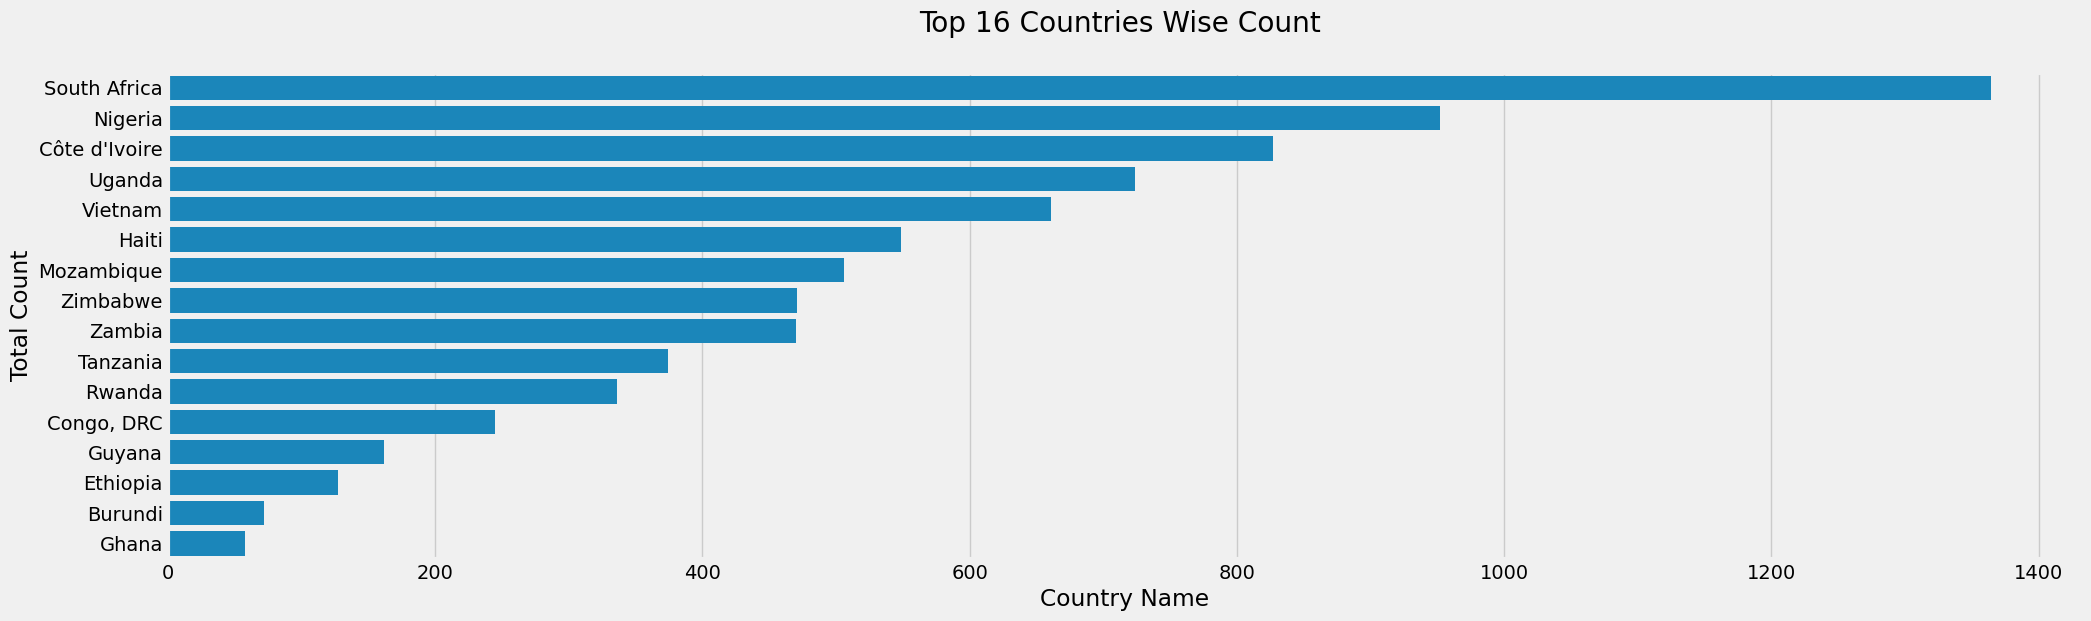

In [ ]:
DataSet = DataSet.dropna()
ItemCount = DataSet["Country"].value_counts().nlargest(43)
print("Top 43 Countries Wise Count \n")
print(ItemCount)
plt.figure(figsize=(22,6))
sns.countplot(DataSet['Country'],order = DataSet['Country'].value_counts().nlargest(16).index)
plt.title('Top 16 Countries Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Country Name')

In [ ]:
shipment_mode_counts = DataSet['Shipment Mode'].value_counts()

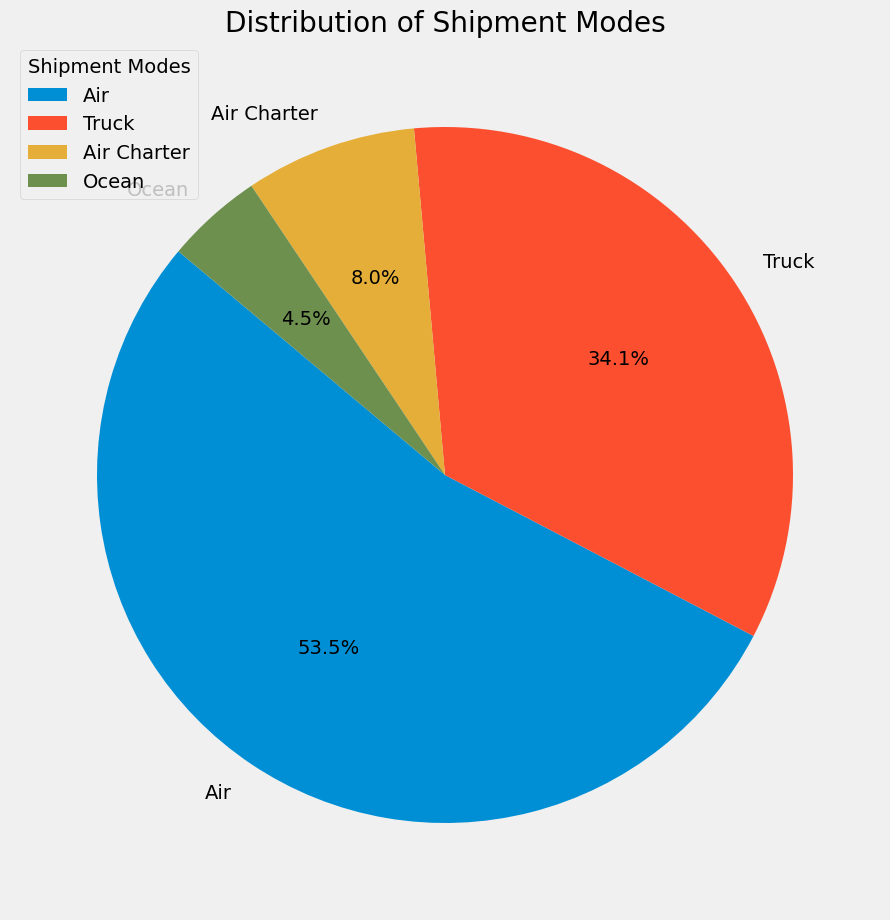

In [ ]:
plt.figure(figsize=(10, 30))
plt.pie(shipment_mode_counts, labels=shipment_mode_counts.index, autopct='%1.1f%%', startangle=140)
plt.legend(title='Shipment Modes', loc='upper left')
plt.title('Distribution of Shipment Modes')
plt.show()

In [ ]:
regex = {
    "id_number": ":\d*"
}

def change_to_number(freight_cost_usd):
    match = re.search(regex['id_number'], freight_cost_usd, re.IGNORECASE)
    if match:
        id = match.group(0).replace(':','')
        filtered = DataSet.query("ID == "+id)
        return filtered['Freight_Cost_USD'].item()
    else:
        return freight_cost_usd

def convert_to_number(weight):
    match = re.search(regex['id_number'], weight, re.IGNORECASE)
    if match:
        id = match.group(0).replace(':','')
        filtered = DataSet.query("ID == "+id)
        return filtered['Weight (Kilograms)'].item()
    else:
        return weight

In [ ]:
DataSet['Freight_Cost_USD_Clean'] = DataSet['Freight_Cost_USD'].apply(change_to_number)
DataSet['Weight_Kilograms_Clean'] = DataSet['Weight (Kilograms)'].apply(convert_to_number)

In [ ]:
DataSet

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight_Cost_USD,Line Item Insurance (USD),Freight_Cost_USD_Clean,Weight_Kilograms_Clean
21,108,104-CI-T01,Pre-PQ Process,SCMS-698,ASN-727,Côte d'Ivoire,PMO - US,Direct Drop,CIP,Air,...,140581.50,25.50,0.42,"BMS Meymac, France",Yes,2126,Freight Included in Commodity Cost,224.93,Freight Included in Commodity Cost,2126
22,115,108-VN-T01,Pre-PQ Process,SCMS-753,ASN-781,Vietnam,PMO - US,Direct Drop,EXW,Air,...,1920.00,1.92,0.01,"Aurobindo Unit III, India",Yes,941,4193.49,3.07,4193.49,941
23,116,108-VN-T01,Pre-PQ Process,SCMS-759,ASN-632,Vietnam,PMO - US,Direct Drop,FCA,Air,...,41095.00,82.19,0.68,ABBVIE Ludwigshafen Germany,Yes,117,1767.38,65.75,1767.38,117
29,161,117-ET-T01,Pre-PQ Process,SCMS-11070,ASN-916,Ethiopia,PMO - US,Direct Drop,EXW,Air,...,99200.00,1.55,0.03,"Aurobindo Unit III, India",Yes,4228,12237.61,158.72,12237.61,4228
32,269,108-VN-T01,Pre-PQ Process,SCMS-14190,ASN-1192,Vietnam,PMO - US,Direct Drop,EXW,Air,...,17000.00,17.00,0.57,Gilead(Nycomed) Oranienburg DE,Yes,76,2282.57,27.20,2282.57,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79,46111.55,25880
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71,14734.92,4426
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04,Freight Included in Commodity Cost,Weight Captured Separately
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03,Freight Included in Commodity Cost,1392


In [ ]:
freight_cost_indexes = DataSet.index[(DataSet['Freight_Cost_USD_Clean'] == 'Freight Included in Commodity Cost')
                        | (DataSet['Freight_Cost_USD_Clean'] == 'Invoiced Separately')].tolist()
weight_indexes = DataSet.index[DataSet['Weight_Kilograms_Clean'] == 'Weight Captured Separately'].tolist()
shipment_indexes = DataSet.index[DataSet['Shipment Mode'] == 'no_value'].tolist()
print("Freight_Cost_USD_Clean indexes:",len(freight_cost_indexes))
print("Weight_Kilograms_Clean indexes:",len(weight_indexes))
print("Shipment Mode indexes:         ",len(shipment_indexes))

indexes = list(set(freight_cost_indexes + weight_indexes + shipment_indexes))
print("Indexes:",len(indexes))
DataSetClean = DataSet.drop(indexes)

print("Size:", DataSetClean.shape)

DataSetClean[['Unit of Measure (Per Pack)', 'Line Item Quantity', 'Pack Price', 'Unit Price', 'Weight (Kilograms)',
                          'Country', 'Shipment Mode', 'Freight_Cost_USD']]

Freight_Cost_USD_Clean indexes: 1532
Weight_Kilograms_Clean indexes: 1384
Shipment Mode indexes:          0
Indexes: 1556
Size: (6602, 35)


,Unit of Measure (Per Pack),Line Item Quantity,Pack Price,Unit Price,Weight (Kilograms),Country,Shipment Mode,Freight_Cost_USD
22,240,1000,1.92,0.01,941,Vietnam,Air,4193.49
23,120,500,82.19,0.68,117,Vietnam,Air,1767.38
29,60,64000,1.55,0.03,4228,Ethiopia,Air,12237.61
32,30,1000,17.00,0.57,76,Vietnam,Air,2282.57
33,60,400,8.38,0.14,23,Vietnam,Air,2149.05
...,...,...,...,...,...,...,...,...
10316,60,15000,6.52,0.11,1547,Nigeria,Air Charter,3410
10317,30,6724,3.12,0.10,See DN-4282 (ID#:83919),Nigeria,Air,See DN-4282 (ID#:83919)
10318,60,205243,3.60,0.06,See DN-4307 (ID#:83920),Zimbabwe,Truck,See DN-4307 (ID#:83920)
10319,60,166571,3.60,0.06,See DN-4307 (ID#:83920),Zimbabwe,Truck,See DN-4307 (ID#:83920)


In [ ]:
shipment_mode = DataSetClean['Shipment Mode'].unique()
print('shipment mode', shipment_mode, '\n')

countries = DataSetClean['Country'].unique()
print('countries', countries, '\n')

manufacturing = DataSetClean['Manufacturing Site'].unique()
print('manufacturing', manufacturing)

shipment mode ['Air' 'Truck' 'Air Charter' 'Ocean'] 

countries ['Vietnam' 'Ethiopia' 'Tanzania' 'Nigeria' "Côte d'Ivoire" 'Haiti'
 'Rwanda' 'Uganda' 'Namibia' 'Guyana' 'Zimbabwe' 'Mozambique' 'Zambia'
 'Swaziland' 'South Africa' 'Malawi' 'Congo, DRC' 'Benin' 'Cameroon'
 'Ghana' 'Togo' 'Angola' 'Afghanistan' 'Dominican Republic' 'Guatemala'
 'South Sudan' 'Botswana' 'Burundi' 'Libya' 'Senegal' 'Kenya'] 

manufacturing ['Aurobindo Unit III, India' 'ABBVIE Ludwigshafen Germany'
 'Gilead(Nycomed) Oranienburg DE' 'Ranbaxy, Paonta Shahib, India'
 'Mylan (formerly Matrix) Nashik' 'BMS Meymac, France'
 'Novartis Pharma AG, Switzerland' 'Ipca Dadra/Nagar Haveli IN'
 'MSD, Haarlem, NL' 'Gland Pharma Ltd Pally Factory' 'Cipla, Goa, India'
 'ABBVIE (Abbott) Logis. UK' 'Hetero Unit III Hyderabad IN'
 'ABBVIE (Abbott) France' 'Aspen-OSD, Port Elizabeth, SA'
 'Strides, Bangalore, India.' 'Novartis Pharma Suffern, USA' 'Roche Basel'
 'GSK Mississauga (Canada)' 'Micro Labs Ltd. (Brown & Burk), India'


In [ ]:
from sklearn.preprocessing import LabelEncoder
le_country = LabelEncoder()
le_shipment_mode = LabelEncoder()
le_manufacturing_site = LabelEncoder()

# Encode the categorical columns
DataSetClean['country_encoded'] = le_country.fit_transform(DataSetClean['Country'])
DataSetClean['shipment_mode_encoded'] = le_shipment_mode.fit_transform(DataSetClean['Shipment Mode'])
DataSetClean['manufacturing_site_encoded'] = le_manufacturing_site.fit_transform(DataSetClean['Manufacturing Site'])

In [ ]:
country_mapping = dict(zip(le_country.classes_, le_country.transform(le_country.classes_)))
shipment_mode_mapping = dict(zip(le_shipment_mode.classes_, le_shipment_mode.transform(le_shipment_mode.classes_)))
manufacturing_site_mapping = dict(zip(le_manufacturing_site.classes_, le_manufacturing_site.transform(le_manufacturing_site.classes_)))

print("Country Mapping:", country_mapping)
print("Shipment Mode Mapping:", shipment_mode_mapping)
print("Manufacturing Site Mapping:", manufacturing_site_mapping)

Country Mapping: {'Afghanistan': 0, 'Angola': 1, 'Benin': 2, 'Botswana': 3, 'Burundi': 4, 'Cameroon': 5, 'Congo, DRC': 6, "Côte d'Ivoire": 7, 'Dominican Republic': 8, 'Ethiopia': 9, 'Ghana': 10, 'Guatemala': 11, 'Guyana': 12, 'Haiti': 13, 'Kenya': 14, 'Libya': 15, 'Malawi': 16, 'Mozambique': 17, 'Namibia': 18, 'Nigeria': 19, 'Rwanda': 20, 'Senegal': 21, 'South Africa': 22, 'South Sudan': 23, 'Swaziland': 24, 'Tanzania': 25, 'Togo': 26, 'Uganda': 27, 'Vietnam': 28, 'Zambia': 29, 'Zimbabwe': 30}
Shipment Mode Mapping: {'Air': 0, 'Air Charter': 1, 'Ocean': 2, 'Truck': 3}
Manufacturing Site Mapping: {'ABBVIE (Abbott) France': 0, 'ABBVIE (Abbott) Logis. UK': 1, "ABBVIE (Abbott) St. P'burg USA": 2, 'ABBVIE Ludwigshafen Germany': 3, 'Aspen-OSD, Port Elizabeth, SA': 4, 'Aurobindo Unit III, India': 5, 'Aurobindo Unit VII, IN': 6, 'BMS Evansville, US': 7, 'BMS Meymac, France': 8, 'Bristol-Myers Squibb Anagni IT': 9, 'Cipla Ltd A-42 MIDC Mahar. IN': 10, 'Cipla, Goa, India': 11, 'Cipla, Kurkumbh, 

In [ ]:
DataSetClean['Freight_Cost_USD_Clean'] = pd.to_numeric(DataSetClean['Freight_Cost_USD_Clean'])
DataSetClean['Weight_Kilograms_Clean'] = pd.to_numeric(DataSetClean['Weight_Kilograms_Clean'])
DataSetClean.dtypes

,0
ID,int64
Project Code,object
PQ #,object
PO / SO #,object
ASN/DN #,object
Country,object
Managed By,object
Fulfill Via,object
Vendor INCO Term,object
Shipment Mode,object


In [ ]:
DataSetClean = DataSetClean.reset_index(drop=True)


In [ ]:
predictors = DataSetClean[['Unit of Measure (Per Pack)', 'Line Item Quantity', 'Pack Price', 'Unit Price', 'Weight_Kilograms_Clean',
                          'country_encoded', 'shipment_mode_encoded', 'manufacturing_site_encoded']]
predictors

,Unit of Measure (Per Pack),Line Item Quantity,Pack Price,Unit Price,Weight_Kilograms_Clean,country_encoded,shipment_mode_encoded,manufacturing_site_encoded
0,240,1000,1.92,0.01,941,28,0,5
1,120,500,82.19,0.68,117,28,0,3
2,60,64000,1.55,0.03,4228,9,0,5
3,30,1000,17.00,0.57,76,28,0,18
4,60,400,8.38,0.14,23,28,0,45
...,...,...,...,...,...,...,...,...
6597,60,15000,6.52,0.11,1547,19,1,5
6598,30,6724,3.12,0.10,6183,19,0,49
6599,60,205243,3.60,0.06,25880,30,3,11
6600,60,166571,3.60,0.06,25880,30,3,40


In [ ]:
targets = DataSetClean.Freight_Cost_USD_Clean
targets

,Freight_Cost_USD_Clean
0,4193.49
1,1767.38
2,12237.61
3,2282.57
4,2149.05
...,...
6597,3410.00
6598,47281.56
6599,46111.55
6600,46111.55


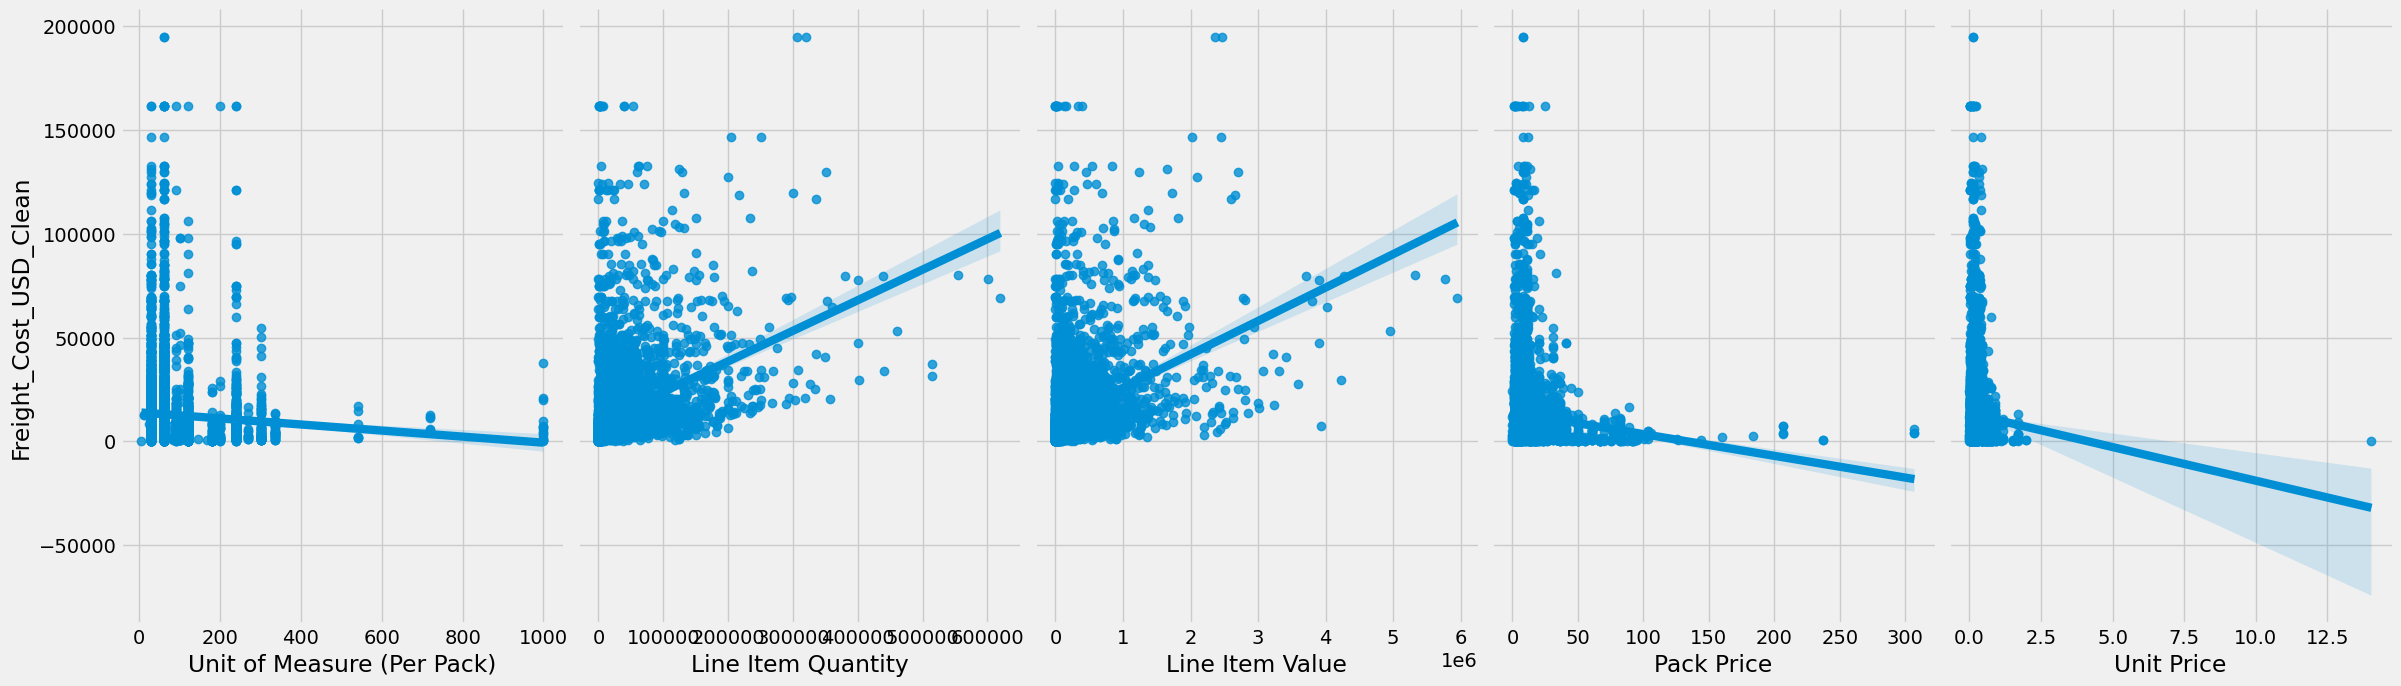

In [ ]:
sns.pairplot(DataSetClean,
            x_vars=['Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price'],
            y_vars='Freight_Cost_USD_Clean', height=7, aspect=0.7, kind='reg')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(predictors, targets, test_size=0.2, random_state=42)

print('test features shape: ', X_test.shape)
print('test targets shape: ', y_test.shape)

print('train features shape: ', X_train.shape)
print('train targets shape: ', y_train.shape)

test features shape:  (1321, 8)
test targets shape:  (1321,)
train features shape:  (5281, 8)
train targets shape:  (5281,)


In [ ]:
tree_regressor = DecisionTreeRegressor(max_depth=15) # MAE 6.08 minutes, R2 -1.20

tree_regressor = tree_regressor.fit(X_train, y_train)

print('node_count => ', tree_regressor.tree_.node_count)

tree_regressor.get_params()

node_count =>  4483


{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 15,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

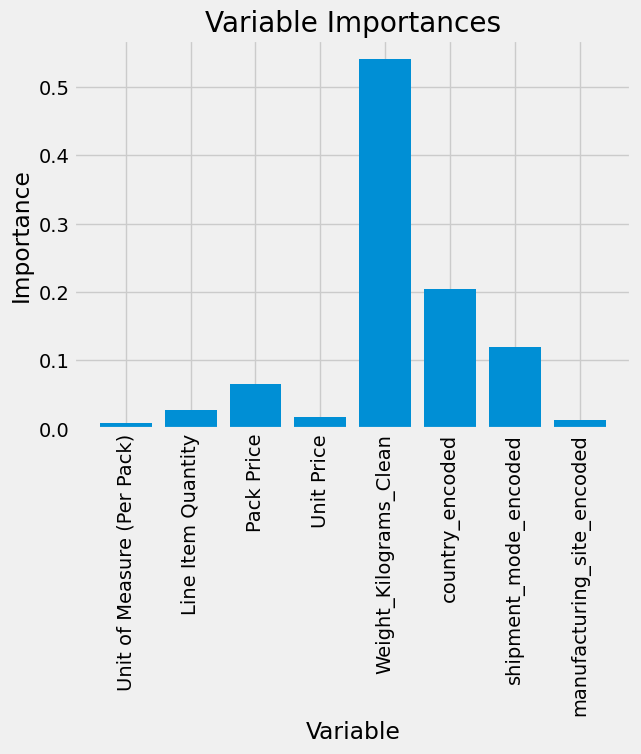

In [ ]:
# Saving feature names for later use
feature_list = list(predictors.columns)
importances = list(tree_regressor.feature_importances_)

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
tree_predictions = tree_regressor.predict(X_test)
df = pd.DataFrame({'Actual':y_test, 'Predicted':tree_predictions})
df

,Actual,Predicted
4256,10651.44,12263.269103
3167,5121.68,5276.818571
5424,16978.83,13657.346000
4019,15919.75,14990.326667
683,2437.63,1792.950000
...,...,...
414,3629.37,9553.010000
5566,4017.70,3245.896667
654,22666.98,19272.935000
6054,7317.96,4270.608750


In [ ]:
results = pd.DataFrame({'Score':['Mean Absolute Error', 'Root Mean Squared Error', 'Mean Squared Error', 'R Square']})
tree_score = [metrics.mean_absolute_error(y_test, tree_predictions),
             np.sqrt(metrics.mean_squared_error(y_test, tree_predictions)),
             metrics.mean_squared_error(y_test, tree_predictions)/10000,
             metrics.r2_score(y_test, tree_predictions)*10000]
results['Tree Desicion'] = tree_score

print('Mean Absolute Error:     {} [$]'.format(results.iloc[0, 1]))
print('Root Mean Squared Error: {} [$]'.format(results.iloc[1, 1]))
print('Mean Squared Error:      {} [$]'.format(results.iloc[2, 1]))
print('R Square:                {} [%]'.format(results.iloc[3, 1])) # 1 is better
results

Mean Absolute Error:     4831.049117764596 [$]
Root Mean Squared Error: 10882.801258462949 [$]
Mean Squared Error:      11843.536323120274 [$]
R Square:                6874.242921998763 [%]


,Score,Tree Desicion
0,Mean Absolute Error,4831.049118
1,Root Mean Squared Error,10882.801258
2,Mean Squared Error,11843.536323
3,R Square,6874.242922


In [ ]:
rand_forest_regressor = RandomForestRegressor(n_estimators=500, random_state=3)

rand_forest_regressor = rand_forest_regressor.fit(X_train, y_train)

rand_forest_regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 3,
 'verbose': 0,
 'warm_start': False}

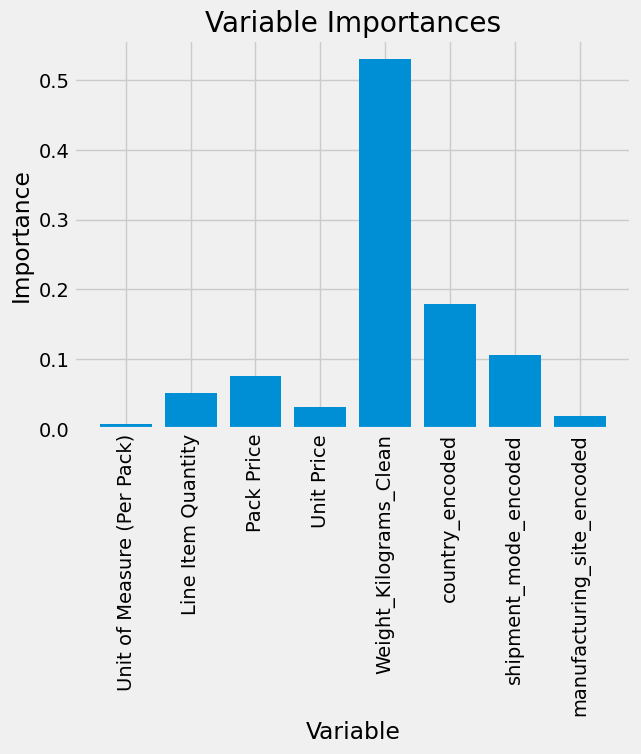

In [ ]:
# Saving feature names for later use
feature_list = list(predictors.columns)
importances = list(rand_forest_regressor.feature_importances_)

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation='vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
rf_predictions = rand_forest_regressor.predict(X_test)
df = pd.DataFrame({'Actual':y_test, 'Predicted':rf_predictions})
df

,Actual,Predicted
4256,10651.44,13839.42090
3167,5121.68,5616.97886
5424,16978.83,15732.84404
4019,15919.75,12562.98986
683,2437.63,4220.99384
...,...,...
414,3629.37,5494.53016
5566,4017.70,2926.92294
654,22666.98,20255.06482
6054,7317.96,5808.19666


In [ ]:
rf_score = [metrics.mean_absolute_error(y_test, rf_predictions),
            np.sqrt(metrics.mean_squared_error(y_test, rf_predictions)),
            metrics.mean_squared_error(y_test, rf_predictions)/10000,
            metrics.r2_score(y_test, rf_predictions)*10000]
results['Random Forest'] = rf_score

print('Mean Absolute Error:     {} [$]'.format(results.iloc[0, 2]))
print('Root Mean Squared Error: {} [$]'.format(results.iloc[1, 2]))
print('Mean Squared Error:      {} [$]'.format(results.iloc[2, 2]))
print('R Square:                {} [%]'.format(results.iloc[3, 2])) # 1 is better
results

Mean Absolute Error:     4399.0509703633015 [$]
Root Mean Squared Error: 8870.406287232565 [$]
Mean Squared Error:      7868.410770057502 [$]
R Square:                7923.361740435924 [%]


,Score,Tree Desicion,Random Forest
0,Mean Absolute Error,4831.049118,4399.050970
1,Root Mean Squared Error,10882.801258,8870.406287
2,Mean Squared Error,11843.536323,7868.410770
3,R Square,6874.242922,7923.361740


In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(rand_forest_regressor, open(filename, 'wb'))

In [ ]:
#loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))